In [ ]:
# Import necessary libraries and modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import data_preprocessing
import model
from data_preprocessing import DataPreprocessing
from model import ModelTraining

# Step 1: Data Preprocessing
# Initialize data preprocessing with the dataset
dp = DataPreprocessing(filepath="data/go_emotions_dataset.csv")

# Load and preprocess the data
df = dp.load_data()
df = dp.preprocess_data(df)

# Split the data into training and validation sets
dp.split_data(df)

# Retrieve processed data and label mappings
train_df, val_df, label2id, id2label = dp.get_data()

e:\Courses & Assignments\Natural Language Processing\NLP Final Project\data_preprocessing.py:17: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(self.filepath, encoding="latin-1")


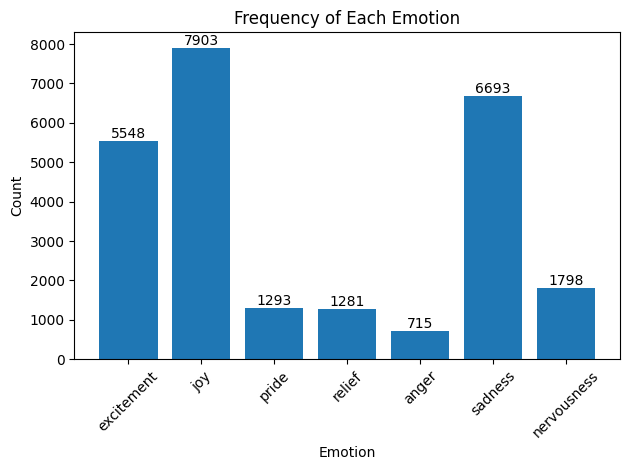

In [227]:
# Calculate the total count for each emotion
emotion_counts = df[dp.emotion_cols].sum()

# Plot a bar chart showing the frequency of each emotion
plt.bar(emotion_counts.index, emotion_counts.values)
plt.title("Frequency of Each Emotion")  # Add a title to the chart
plt.xlabel("Emotion")  # Label for the x-axis
plt.ylabel("Count")  # Label for the y-axis
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Add text annotations showing the exact count on top of each bar
for index, value in enumerate(emotion_counts.values):
    plt.text(index, value, str(value), ha='center', va='bottom', fontsize=10)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

In [2]:
# Step 2: Model Training
mt = ModelTraining(label2id=label2id, id2label=id2label)

# Train traditional models
results_traditional = mt.train_traditional_models(train_df, val_df)

# Print the classification reports for the two models
print("Logistic Regression Report:\n", results_traditional['logreg']['report'])
print("Random Forest Report:\n", results_traditional['rf']['report'])

Logistic Regression Report:
               precision    recall  f1-score   support

       anger       0.22      0.17      0.19        36
  excitement       0.62      0.58      0.60       277
         joy       0.60      0.66      0.63       351
 nervousness       0.41      0.34      0.37        87
       pride       0.42      0.31      0.36        58
      relief       0.58      0.38      0.46        58
     sadness       0.67      0.76      0.71       314

    accuracy                           0.60      1181
   macro avg       0.50      0.46      0.47      1181
weighted avg       0.59      0.60      0.59      1181

Random Forest Report:
               precision    recall  f1-score   support

       anger       0.11      0.06      0.07        36
  excitement       0.58      0.61      0.59       277
         joy       0.58      0.59      0.59       351
 nervousness       0.49      0.26      0.34        87
       pride       0.45      0.29      0.35        58
      relief       0.52   

In [3]:
# Train BERT Model
results_bert = mt.train_bert_model(train_df, val_df)

# Print the classification reports for BERT model
print("BERT Report:\n", results_bert['report'])

c:\Users\Leo\AppData\Local\Programs\Python\Python311\Lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
c:\Users\Leo\AppData\Local\Programs\Python\Python311\Lib\site-packages\transformers\training_args.py:1525: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


  0%|          | 0/2804 [00:00<?, ?it/s]

Attempted to log scalar metric loss:
1.5946
Attempted to log scalar metric grad_norm:
18.14244842529297
Attempted to log scalar metric learning_rate:
4.9108416547788875e-05
Attempted to log scalar metric epoch:
0.03566333808844508
{'loss': 1.5946, 'grad_norm': 18.14244842529297, 'learning_rate': 4.9108416547788875e-05, 'epoch': 0.04}
Attempted to log scalar metric loss:
1.2833
Attempted to log scalar metric grad_norm:
4.054147243499756
Attempted to log scalar metric learning_rate:
4.821683309557775e-05
Attempted to log scalar metric epoch:
0.07132667617689016
{'loss': 1.2833, 'grad_norm': 4.054147243499756, 'learning_rate': 4.821683309557775e-05, 'epoch': 0.07}
Attempted to log scalar metric loss:
1.2025
Attempted to log scalar metric grad_norm:
14.148418426513672
Attempted to log scalar metric learning_rate:
4.732524964336662e-05
Attempted to log scalar metric epoch:
0.10699001426533523
{'loss': 1.2025, 'grad_norm': 14.148418426513672, 'learning_rate': 4.732524964336662e-05, 'epoch': 

  0%|          | 0/74 [00:00<?, ?it/s]

Attempted to log scalar metric eval_loss:
0.998440682888031
Attempted to log scalar metric eval_accuracy:
0.6367485182049111
Attempted to log scalar metric eval_f1:
0.5167051361584505
Attempted to log scalar metric eval_precision:
0.5474739879586745
Attempted to log scalar metric eval_recall:
0.497712967750179
Attempted to log scalar metric eval_runtime:
37.784
Attempted to log scalar metric eval_samples_per_second:
31.257
Attempted to log scalar metric eval_steps_per_second:
1.959
Attempted to log scalar metric epoch:
1.0
{'eval_loss': 0.998440682888031, 'eval_accuracy': 0.6367485182049111, 'eval_f1': 0.5167051361584505, 'eval_precision': 0.5474739879586745, 'eval_recall': 0.497712967750179, 'eval_runtime': 37.784, 'eval_samples_per_second': 31.257, 'eval_steps_per_second': 1.959, 'epoch': 1.0}
Attempted to log scalar metric loss:
0.7841
Attempted to log scalar metric grad_norm:
4.851502418518066
Attempted to log scalar metric learning_rate:
2.414407988587732e-05
Attempted to log scal

  0%|          | 0/74 [00:00<?, ?it/s]

Attempted to log scalar metric eval_loss:
0.9764068126678467
Attempted to log scalar metric eval_accuracy:
0.6502963590177815
Attempted to log scalar metric eval_f1:
0.5378698569567948
Attempted to log scalar metric eval_precision:
0.5611424125048258
Attempted to log scalar metric eval_recall:
0.5239711582819748
Attempted to log scalar metric eval_runtime:
50.9517
Attempted to log scalar metric eval_samples_per_second:
23.179
Attempted to log scalar metric eval_steps_per_second:
1.452
Attempted to log scalar metric epoch:
2.0
{'eval_loss': 0.9764068126678467, 'eval_accuracy': 0.6502963590177815, 'eval_f1': 0.5378698569567948, 'eval_precision': 0.5611424125048258, 'eval_recall': 0.5239711582819748, 'eval_runtime': 50.9517, 'eval_samples_per_second': 23.179, 'eval_steps_per_second': 1.452, 'epoch': 2.0}
Attempted to log scalar metric train_runtime:
10430.5391
Attempted to log scalar metric train_samples_per_second:
4.3
Attempted to log scalar metric train_steps_per_second:
0.269
Attempte

  0%|          | 0/74 [00:00<?, ?it/s]

Attempted to log scalar metric eval_loss:
0.9764068126678467
Attempted to log scalar metric eval_accuracy:
0.6502963590177815
Attempted to log scalar metric eval_f1:
0.5378698569567948
Attempted to log scalar metric eval_precision:
0.5611424125048258
Attempted to log scalar metric eval_recall:
0.5239711582819748
Attempted to log scalar metric eval_runtime:
53.6696
Attempted to log scalar metric eval_samples_per_second:
22.005
Attempted to log scalar metric eval_steps_per_second:
1.379
Attempted to log scalar metric epoch:
2.0


  0%|          | 0/74 [00:00<?, ?it/s]

BERT Report:
               precision    recall  f1-score   support

     sadness       0.72      0.85      0.78       314
  excitement       0.66      0.61      0.63       277
         joy       0.65      0.69      0.67       351
 nervousness       0.54      0.36      0.43        87
       pride       0.58      0.48      0.53        58
      relief       0.44      0.38      0.41        58
       anger       0.32      0.31      0.31        36

    accuracy                           0.65      1181
   macro avg       0.56      0.52      0.54      1181
weighted avg       0.64      0.65      0.64      1181



                 Model  F1_score
0  Logistic Regression  0.474001
1        Random Forest  0.430954
2                 BERT  0.537870


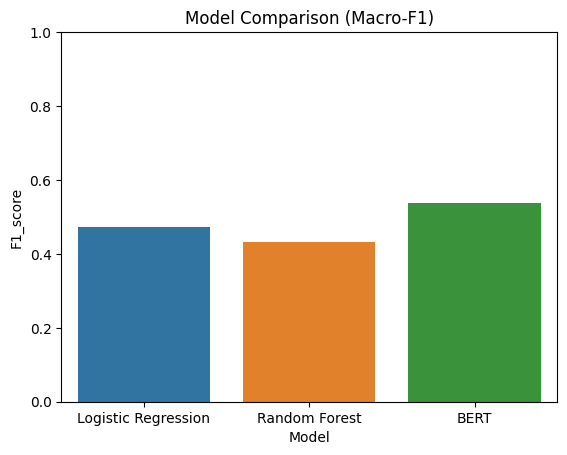

In [4]:
# Compare the performance of traditional models (Logistic Regression, Random Forest)
# and the BERT model using metrics such as Macro-F1 scores.
mt.compare_models(results_traditional, results_bert)

In [78]:
# Load the BERT tokenizer
tokenizer = model.BertTokenizerFast.from_pretrained("bert-base-uncased")

# Load and preprocess the test data
test_data = pd.read_csv("data/GPT_generated_data_with_emotions.csv")
test_data['example_very_unclear'] = "FALSE"  # Set unclear examples to FALSE
test_data = dp.preprocess_data(test_data)  # Preprocess the data

# Tokenize the test data for BERT
test_encodings = tokenizer(test_data['text_clean'].tolist(), truncation=True, padding=True, max_length=128)

# Map emotion labels to IDs
test_labels = test_data['label'].map(mt.label2id).values

# Prepare HuggingFace test dataset
hf_test_dataset = model.HFDataset.from_dict({
    'input_ids': test_encodings['input_ids'],
    'attention_mask': test_encodings['attention_mask'],
    'labels': test_labels
})

# Predict with the BERT model
test_preds = mt.bert_trainer.predict(hf_test_dataset).predictions
pred_labels = np.argmax(test_preds, axis=1)  # Get predicted labels

# Generate classification report and Macro-F1 score
report = model.classification_report(test_labels, pred_labels, target_names=mt.emotion_cols)
f1 = model.f1_score(test_labels, pred_labels, average='macro')

# Print the evaluation report
print("BERT Report:\n", report)

BERT Report:
               precision    recall  f1-score   support

     sadness       0.79      0.92      0.85        12
  excitement       0.86      0.75      0.80         8
         joy       0.67      0.86      0.75         7
 nervousness       0.67      0.80      0.73        10
       pride       0.80      0.67      0.73         6
      relief       1.00      0.33      0.50         3
       anger       1.00      0.50      0.67         4

    accuracy                           0.76        50
   macro avg       0.83      0.69      0.72        50
weighted avg       0.79      0.76      0.75        50



In [97]:
# Generate the list of years from 2017 to 2023
years = list(range(2017, 2024))

# Initialize a dictionary to store DataFrames for each year
dataframes = {}

# Loop through each year, process the data, and make predictions
for year in years:
    # Dynamically generate the file name for the current year
    file_name = f"data/UEFA_F{year}_merged_labeled.csv"

    # Load the CSV file, drop rows with missing "flair", and select relevant columns
    dataframes[year] = pd.read_csv(file_name).dropna(subset=['flair'])[['text', 'flair']]

    # Clean the "flair" column: remove colons and replace underscores with spaces
    dataframes[year]['flair'] = dataframes[year]['flair'].str.strip(':').str.replace('_', ' ')

    # Ensure "text" is treated as a string and clean it
    dataframes[year]['text'] = dataframes[year]['text'].astype(str)
    dataframes[year]['text_clean'] = dataframes[year]['text'].apply(dp.clean_text)

    # Tokenize the cleaned text for BERT
    year_encodings = tokenizer(dataframes[year]['text_clean'].tolist(), truncation=True, padding=True, max_length=128)

    # Prepare the HuggingFace dataset for prediction
    hf_year_dataset = model.HFDataset.from_dict({
        'input_ids': year_encodings['input_ids'],
        'attention_mask': year_encodings['attention_mask']
    })

    # Use the trained BERT model to predict emotion labels
    year_preds = mt.bert_trainer.predict(hf_year_dataset).predictions

    # Add the predicted labels to the DataFrame
    dataframes[year]['labels'] = np.argmax(year_preds, axis=1)

  0%|          | 0/244 [00:00<?, ?it/s]

  0%|          | 0/304 [00:00<?, ?it/s]

  0%|          | 0/346 [00:00<?, ?it/s]

  0%|          | 0/301 [00:00<?, ?it/s]

  0%|          | 0/349 [00:00<?, ?it/s]

  0%|          | 0/315 [00:00<?, ?it/s]

In [176]:
# Define the list of target teams and emotions
teams = ['Real Madrid', 'FC Barcelona', 'Chelsea', 'Manchester United', 'Liverpool', 'Tottenham Hotspur',
         'Arsenal', 'Manchester City', 'Juventus', 'Inter Milan', 'AC Milan', 'Bayern Munich']
emotions = list(dp.label2id.keys())  # Get the list of emotions from the label-to-ID mapping

# Initialize DataFrames to store yearly counts of teams and emotions
count_teams = pd.DataFrame(index=years, columns=teams)  # Count of texts for each team by year
count_emotions = pd.DataFrame(index=years, columns=emotions)  # Count of texts for each emotion by year

# Dictionary to store emotion counts for each team across years
teams_emotions = {}

# Process data year by year
for year in years:
    # Filter data to include only the specified teams
    dataframes[year] = dataframes[year][dataframes[year]['flair'].isin(teams)]

    # Map numeric labels to emotion names
    dataframes[year]['emotions'] = dataframes[year]['labels'].apply(lambda x: dp.id2label[x])

    # Count the number of texts per team and update the DataFrame
    count_teams.loc[year] = dataframes[year].groupby('flair').count().reindex(teams)['text'].values

    # Count the number of texts per emotion and update the DataFrame
    count_emotions.loc[year] = dataframes[year].groupby('emotions').count().reindex(emotions)['text'].values

    # Create a pivot table showing emotion counts per team and store in the dictionary
    teams_emotions[year] = (dataframes[year].groupby(['flair', 'emotions']).size()
                                            .reset_index(name='count')  # Convert groupby result to a DataFrame
                                            .pivot(index='flair', columns='emotions', values='count')  # Pivot table
                                            .fillna(0).astype(int)  # Fill missing values with 0 and cast to int
                                            .reindex(teams)[emotions])  # Reindex to ensure consistent ordering

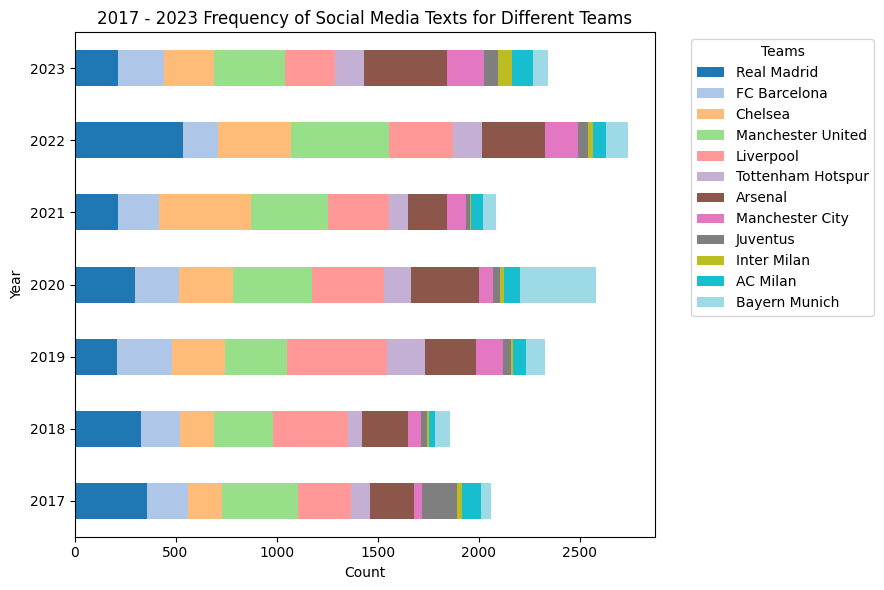

In [229]:
# Create a horizontal stacked bar plot for team text frequencies
count_teams.plot(kind='barh', stacked=True, figsize=(9, 6), colormap='tab20')

# Add title and axis labels
plt.title("2017 - 2023 Frequency of Social Media Texts for Different Teams")
plt.ylabel("Year")  # Y-axis represents the years
plt.xlabel("Count")  # X-axis represents the number of texts

# Add a legend to identify the teams
plt.legend(title="Teams", bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout to ensure elements fit properly
plt.tight_layout()

# Display the plot
plt.show()

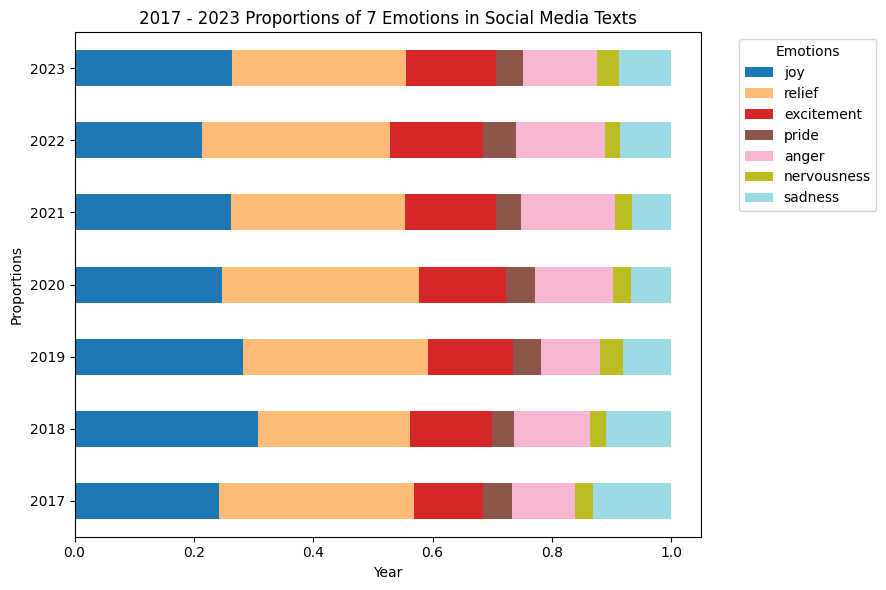

In [225]:
# Calculate proportions of emotions for each year
proportion_emotions = count_emotions.div(count_emotions.sum(axis=1), axis=0)

# Create a horizontal stacked bar plot for emotion proportions
proportion_emotions.plot(
    kind='barh',  # Horizontal bar chart
    stacked=True,  # Stacked to show proportions
    figsize=(9, 6),  # Figure size
    colormap='tab20'  # Color map for differentiation
)

# Add title and axis labels
plt.title("2017 - 2023 Proportions of 7 Emotions in Social Media Texts")
plt.xlabel("Proportions")  # X-axis shows proportions
plt.ylabel("Year")  # Y-axis represents the years

# Add legend for the emotions
plt.legend(title="Emotions", bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout to ensure all elements fit properly
plt.tight_layout()

# Display the plot
plt.show()

In [195]:
# List of UEFA Champions League winners from 2017 to 2023
champions = ['Real Madrid', 'Real Madrid', 'Liverpool', 'Bayern Munich', 'Chelsea', 'Real Madrid', 'Manchester City']

# Initialize a DataFrame to store emotion proportions for champion teams
champions_emotions = pd.DataFrame(index=years, columns=emotions)

# Sum up emotion counts across all years for all teams
sum_teams_emotions = (teams_emotions[2017] + teams_emotions[2018] + teams_emotions[2019] +
                      teams_emotions[2020] + teams_emotions[2021] + teams_emotions[2022] +
                      teams_emotions[2023])

# Calculate the proportion of each emotion across all years for all teams
proportion_teams_emotions = sum_teams_emotions.div(sum_teams_emotions.sum(axis=1), axis=0)

# Initialize a dictionary to store yearly emotion proportions
year_proportion = {}

# Calculate emotion proportion differences for champions
for i in range(7):
    # Calculate the proportion of emotions for all teams in the current year
    year_proportion[years[i]] = teams_emotions[years[i]].div(teams_emotions[years[i]].sum(axis=1), axis=0)

    # Compute the difference between the champion's yearly emotion proportions and the overall proportion
    champions_emotions.iloc[i] = year_proportion[years[i]].loc[champions[i]] - proportion_teams_emotions.loc[champions[i]]

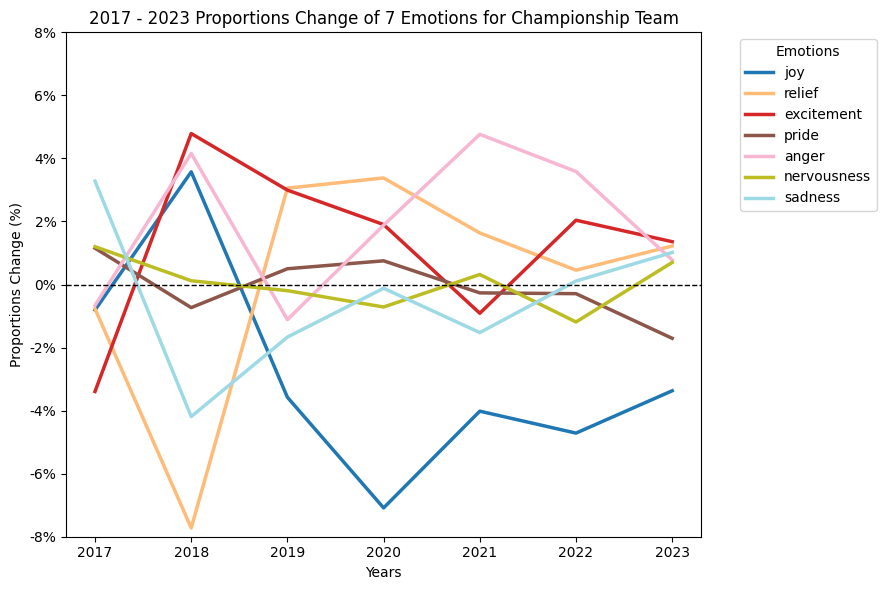

In [ ]:
# Create a line plot for proportions change
champions_emotions.plot(
    kind='line', 
    figsize=(9, 6), 
    colormap='tab20', 
    linewidth=2.5
)

# Add chart details
plt.title("2017 - 2023 Proportions Change of 7 Emotions for Championship Team")
plt.ylabel("Proportions Change (%)")
plt.xlabel("Years")
plt.legend(title="Emotions", bbox_to_anchor=(1.05, 1), loc='upper left')

# Set Y-axis limits and format ticks as percentages
plt.ylim(-0.08, 0.08)  # Set Y-axis range (-8% to +8%)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{x*100:.0f}%"))

# Add a horizontal dashed line at y=0
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)

# Apply tight layout and show the plot
plt.tight_layout()
plt.show()

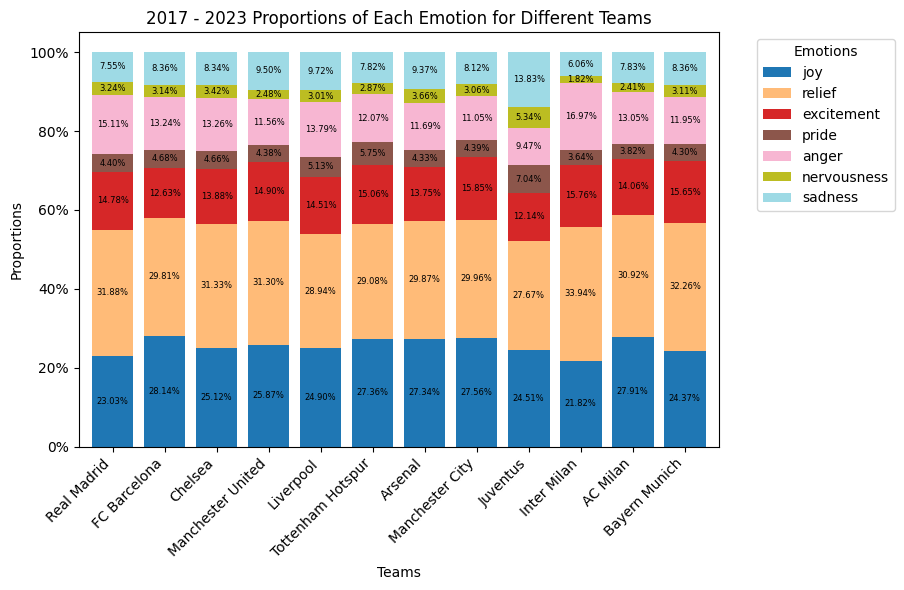

In [214]:
# Plot the proportions of each emotion for different teams as a stacked bar chart
ax = proportion_teams_emotions.plot(
    kind='bar',  # Create a vertical bar chart
    stacked=True,  # Stack bars to represent proportions
    figsize=(9, 6),  # Set figure size
    colormap='tab20',  # Apply color mapping for distinct emotions
    width=0.8  # Adjust bar width
)

# Annotate each bar with percentage values
for i in range(len(proportion_teams_emotions)):  # Loop through each team (bar)
    bottom = 0  # Initialize the starting position for stacking
    for col in proportion_teams_emotions.columns:  # Loop through each emotion
        value = proportion_teams_emotions.iloc[i][col]
        if value > 0:  # Only display non-zero values
            ax.text(
                i, bottom + value / 2, f"{value * 100:.2f}%",  # Text in the middle of each section
                ha='center', va='center', fontsize=6, color='black'
            )
            bottom += value  # Update the base position for the next segment

# Add chart details
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels 45 degrees, align to the right
plt.title("2017 - 2023 Proportions of Each Emotion for Different Teams")  # Add title
plt.ylabel("Proportions")  # Label for the y-axis
plt.xlabel("Teams")  # Label for the x-axis
plt.legend(title="Emotions", bbox_to_anchor=(1.05, 1), loc='upper left')  # Position legend outside the plot
plt.tight_layout()  # Adjust layout to prevent overlap

# Format y-axis as percentages
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{x*100:.0f}%"))

# Display the plot
plt.show()